In [2]:
# Data preprocess

from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# load mnist data
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

# Reshape
x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

# 標準化（0 ~ 255 -> 0 ~ 1）
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

# One-hot encoding 轉換
y_train_one_hot = np_utils.to_categorical(y_train_label)
y_test_one_hot = np_utils.to_categorical(y_test_label)

In [5]:
# Build model

from keras.models import Sequential
from keras.layers import Dense

# 建立 Sequential 模型
model = Sequential()

# 建立輸入層及隱藏層
model.add(Dense(
    # 隱藏層神經元個數 256
    units=256,
    
    # input 神經元個數 784
    input_dim=784,
    
    # 亂數使用常態分佈
    kernel_initializer='normal',
    
    # 激活函數使用 relu
    activation='relu'
))

# 建立輸出層
model.add(Dense(
    # 輸出層神經元個數 10
    units=10,
    
    # 亂數使用常態分佈
    kernel_initializer='normal',
    
    # 激活函數使用 softmax
    activation='softmax'
))

In [7]:
# 查看模型摘要
print(model.summary())

# dense_1 Param = 784 * 256 + 256 = 200960
# dense_2 Param = 256 * 10 + 10 = 2570
# Total params = 200960 + 2570 = 203530
# Trainable params = 200960 + 2570 = 203530
# Trainable params 數值越大，代表此模型越複雜，需要更多時間進行訓練

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# 定義訓練方式
model.compile(
    # loss function 使用 categorical_crossentropy
    loss='categorical_crossentropy',
    
    # optimizer 使用 ADAM
    optimizer='adam',
    
    # 用準確率來評估此模型
    metrics=['accuracy']
)

In [11]:
# 開始訓練

# 用 fit() 進行訓練
# 訓練過程會存在 train_history 中
train_history = model.fit(
    x=x_train_normalize,
    y=y_train_one_hot,
    
    # 將訓練資料的 0.2(20%) 作為驗證資料
    # 即用 60000 * 0.8 = 48000 筆資料來訓練
    # 用 60000 * 0.2 = 12000 筆資料來驗證訓練結果
    validation_split=0.2,
    
    # 訓練 10 次
    epochs=10,
    
    # 每一批次為 200 筆資料
    batch_size=200,
    
    # 顯示訓練過程
    verbose=2
)

# loss, accuracy: 使用訓練資料（60000 * 0.8 = 48000）的「誤差(loss)」與「準確度(accuracy)」
# val_loss, val_accuracy: 使用驗證資料（60000 * 0.2 = 12000）的「誤差(loss)」與「準確度(accuracy)」

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.0262 - accuracy: 0.9939 - val_loss: 0.0821 - val_accuracy: 0.9762
Epoch 2/10
 - 1s - loss: 0.0224 - accuracy: 0.9949 - val_loss: 0.0810 - val_accuracy: 0.9765
Epoch 3/10
 - 1s - loss: 0.0184 - accuracy: 0.9959 - val_loss: 0.0783 - val_accuracy: 0.9771
Epoch 4/10
 - 1s - loss: 0.0154 - accuracy: 0.9971 - val_loss: 0.0792 - val_accuracy: 0.9772
Epoch 5/10
 - 1s - loss: 0.0128 - accuracy: 0.9978 - val_loss: 0.0787 - val_accuracy: 0.9782
Epoch 6/10
 - 1s - loss: 0.0104 - accuracy: 0.9984 - val_loss: 0.0772 - val_accuracy: 0.9788
Epoch 7/10
 - 1s - loss: 0.0088 - accuracy: 0.9988 - val_loss: 0.0800 - val_accuracy: 0.9778
Epoch 8/10
 - 1s - loss: 0.0076 - accuracy: 0.9989 - val_loss: 0.0795 - val_accuracy: 0.9787
Epoch 9/10
 - 1s - loss: 0.0072 - accuracy: 0.9990 - val_loss: 0.0835 - val_accuracy: 0.9780
Epoch 10/10
 - 1s - loss: 0.0054 - accuracy: 0.9995 - val_loss: 0.0870 - val_accuracy: 0.9767


In [14]:
# 建立 show_train_history 顯示訓練過程
import matplotlib.pyplot as plt
def show_train_history(train_histroy, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')

    # 設定圖例
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

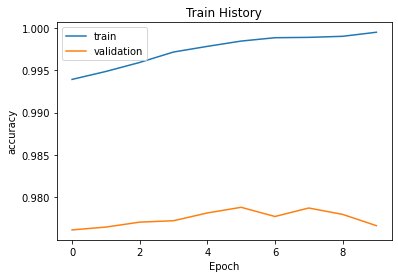

In [16]:
# 畫出 accuracy 執行結果
show_train_history(train_history, 'accuracy', 'val_accuracy')

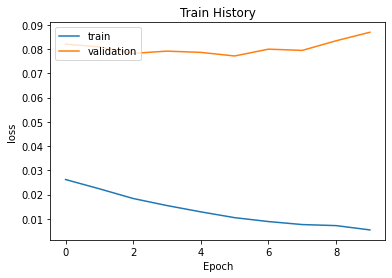

In [17]:
# 畫出 loss 執行結果
show_train_history(train_history, 'loss', 'val_loss')

In [18]:
# 評估模型準確率
score = model.evaluate(x_test_normalize, y_test_one_hot)
print('accuracy = ', score[1])

10000/10000 [==============================] - 0s 13us/step
accuracy =  0.9776999950408936


In [21]:
# 建立 plot_images_labels_prediction() 函數
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()

    # 設定顯示圖形的大小
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(num):

        # 建立 subgraph 為 5 * 5
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap='binary')
        title = 'label = ' + str(labels[idx])
        if len(prediction) > 0:
            title += ', predict = ' + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)

        # 設定不顯示刻度
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

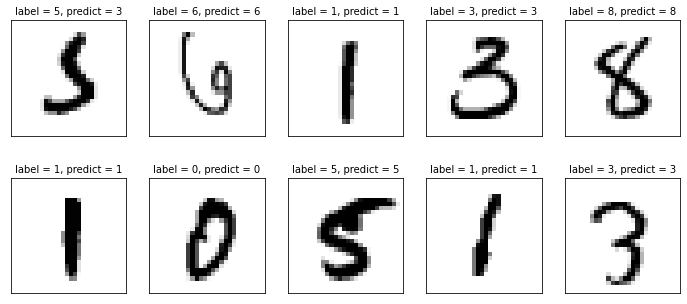

In [22]:
# 預測
prediction = model.predict_classes(x_test)

plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

In [23]:
# 建立混淆矩陣來看每個數字最容易被誤判成哪個數字
import pandas as pd
pd.crosstab(
    y_test_label,
    prediction,
    rownames=['label'],
    colnames=['predict']
)

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,1,0,1,1,3,1,2,1
1,0,1130,2,0,0,1,2,0,0,0
2,5,2,1004,4,1,0,3,8,4,1
3,0,0,1,991,0,4,0,6,1,7
4,1,1,1,2,956,0,4,3,0,14
5,2,0,0,12,1,865,6,1,2,3
6,5,3,1,2,3,6,938,0,0,0
7,0,5,5,2,0,0,0,1010,0,6
8,5,1,5,13,5,9,3,8,914,11


In [26]:
# 建立真實值與預測值 dataframe
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
df

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [28]:
# 查詢 label = 5 但是 predict 為 3 的資料
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3
4360,5,3


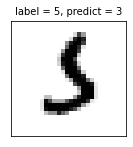

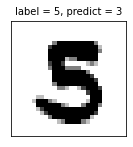

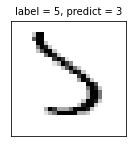

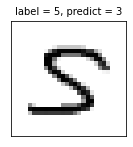

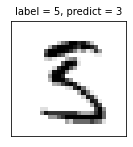

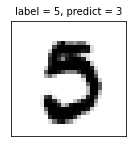

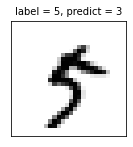

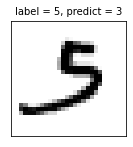

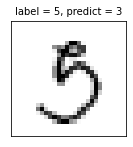

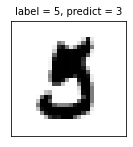

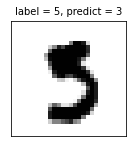

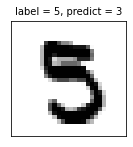

In [31]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340, num=1)
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=1003, num=1)
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=1393, num=1)
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=1670, num=1)
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=2597, num=1)
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=2810, num=1)
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=3117, num=1)
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=3902, num=1)
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=4271, num=1)
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=4360, num=1)
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=5937, num=1)
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=5972, num=1)

In [33]:
# 將隱藏層的神經元個數從 256 增加至 1000 個

# 建立 Sequential 模型
model = Sequential()

# 建立輸入層及隱藏層
model.add(Dense(
    # 隱藏層神經元個數 1000
    units=1000,
    
    # input 神經元個數 784
    input_dim=784,
    
    # 亂數使用常態分佈
    kernel_initializer='normal',
    
    # 激活函數使用 relu
    activation='relu'
))

# 建立輸出層
model.add(Dense(
    # 輸出層神經元個數 10
    units=10,
    
    # 亂數使用常態分佈
    kernel_initializer='normal',
    
    # 激活函數使用 softmax
    activation='softmax'
))

In [34]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
model.compile(
    # loss function 使用 categorical_crossentropy
    loss='categorical_crossentropy',
    
    # optimizer 使用 ADAM
    optimizer='adam',
    
    # 用準確率來評估此模型
    metrics=['accuracy']
)

train_history = model.fit(
    x=x_train_normalize,
    y=y_train_one_hot,
    
    # 將訓練資料的 0.2(20%) 作為驗證資料
    # 即用 60000 * 0.8 = 48000 筆資料來訓練
    # 用 60000 * 0.2 = 12000 筆資料來驗證訓練結果
    validation_split=0.2,
    
    # 訓練 10 次
    epochs=10,
    
    # 每一批次為 200 筆資料
    batch_size=200,
    
    # 顯示訓練過程
    verbose=2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.2916 - accuracy: 0.9163 - val_loss: 0.1538 - val_accuracy: 0.9553
Epoch 2/10
 - 3s - loss: 0.1161 - accuracy: 0.9670 - val_loss: 0.1103 - val_accuracy: 0.9670
Epoch 3/10
 - 3s - loss: 0.0723 - accuracy: 0.9792 - val_loss: 0.0903 - val_accuracy: 0.9729
Epoch 4/10
 - 4s - loss: 0.0506 - accuracy: 0.9855 - val_loss: 0.0785 - val_accuracy: 0.9763
Epoch 5/10
 - 4s - loss: 0.0355 - accuracy: 0.9904 - val_loss: 0.0771 - val_accuracy: 0.9768
Epoch 6/10
 - 4s - loss: 0.0247 - accuracy: 0.9938 - val_loss: 0.0780 - val_accuracy: 0.9758
Epoch 7/10
 - 4s - loss: 0.0182 - accuracy: 0.9956 - val_loss: 0.0754 - val_accuracy: 0.9777
Epoch 8/10
 - 4s - loss: 0.0123 - accuracy: 0.9977 - val_loss: 0.0751 - val_accuracy: 0.9781
Epoch 9/10
 - 4s - loss: 0.0094 - accuracy: 0.9983 - val_loss: 0.0680 - val_accuracy: 0.9801
Epoch 10/10
 - 4s - loss: 0.0060 - accuracy: 0.9992 - val_loss: 0.0714 - val_accuracy: 0.9799


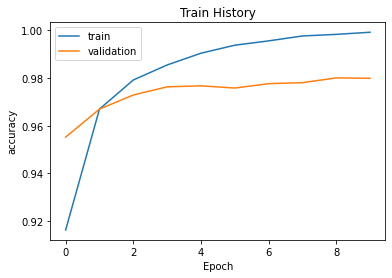

In [37]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

# accuracy 與 val_accuracy 相差過大 -> overfitting 嚴重

In [38]:
# 評估模型準確率
score = model.evaluate(x_test_normalize, y_test_one_hot)
print('accuracy = ', score[1])

10000/10000 [==============================] - 0s 18us/step
accuracy =  0.9814000129699707


In [41]:
from keras.layers import Dropout

# 建立 Sequential 模型
model = Sequential()

# 建立輸入層及隱藏層
model.add(Dense(
    # 隱藏層神經元個數 1000
    units=1000,
    
    # input 神經元個數 784
    input_dim=784,
    
    # 亂數使用常態分佈
    kernel_initializer='normal',
    
    # 激活函數使用 relu
    activation='relu'
))

# 隨機捨棄 0.5(50%) 的神經元來避免 overfitting
model.add(Dropout(0.5))

# 建立輸出層
model.add(Dense(
    # 輸出層神經元個數 10
    units=10,
    
    # 亂數使用常態分佈
    kernel_initializer='normal',
    
    # 激活函數使用 softmax
    activation='softmax'
))

In [42]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model.compile(
    # loss function 使用 categorical_crossentropy
    loss='categorical_crossentropy',
    
    # optimizer 使用 ADAM
    optimizer='adam',
    
    # 用準確率來評估此模型
    metrics=['accuracy']
)

train_history = model.fit(
    x=x_train_normalize,
    y=y_train_one_hot,
    
    # 將訓練資料的 0.2(20%) 作為驗證資料
    # 即用 60000 * 0.8 = 48000 筆資料來訓練
    # 用 60000 * 0.2 = 12000 筆資料來驗證訓練結果
    validation_split=0.2,
    
    # 訓練 10 次
    epochs=10,
    
    # 每一批次為 200 筆資料
    batch_size=200,
    
    # 顯示訓練過程
    verbose=2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3681 - accuracy: 0.8900 - val_loss: 0.1607 - val_accuracy: 0.9556
Epoch 2/10
 - 2s - loss: 0.1634 - accuracy: 0.9526 - val_loss: 0.1180 - val_accuracy: 0.9656
Epoch 3/10
 - 2s - loss: 0.1162 - accuracy: 0.9657 - val_loss: 0.0972 - val_accuracy: 0.9708
Epoch 4/10
 - 2s - loss: 0.0944 - accuracy: 0.9716 - val_loss: 0.0864 - val_accuracy: 0.9747
Epoch 5/10
 - 2s - loss: 0.0778 - accuracy: 0.9765 - val_loss: 0.0824 - val_accuracy: 0.9754
Epoch 6/10
 - 2s - loss: 0.0641 - accuracy: 0.9809 - val_loss: 0.0756 - val_accuracy: 0.9775
Epoch 7/10
 - 2s - loss: 0.0553 - accuracy: 0.9829 - val_loss: 0.0721 - val_accuracy: 0.9768
Epoch 8/10
 - 2s - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0699 - val_accuracy: 0.9785
Epoch 9/10
 - 2s - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0706 - val_accuracy: 0.9793
Epoch 10/10
 - 2s - loss: 0.0373 - accuracy: 0.9878 - val_loss: 0.0650 - val_accuracy: 0.9805


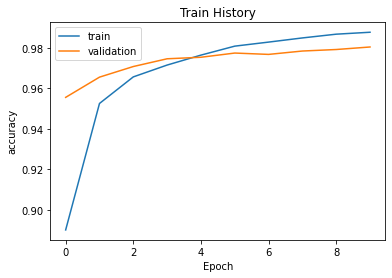

In [44]:
show_train_history(train_history, 'accuracy', 'val_accuracy')
# accuracy, val_accuracy 差距變小，overfitting 不嚴重

In [45]:
# 評估模型準確率
score = model.evaluate(x_test_normalize, y_test_one_hot)
print('accuracy = ', score[1])

10000/10000 [==============================] - 0s 24us/step
accuracy =  0.982200026512146


In [46]:
# 建立 Sequential 模型
model = Sequential()

# 建立輸入層及隱藏層
model.add(Dense(
    # 隱藏層神經元個數 1000
    units=1000,
    
    # input 神經元個數 784
    input_dim=784,
    
    # 亂數使用常態分佈
    kernel_initializer='normal',
    
    # 激活函數使用 relu
    activation='relu'
))

# 隨機捨棄 0.5(50%) 的神經元來避免 overfitting
model.add(Dropout(0.5))

# 建立輸入層及隱藏層
model.add(Dense(
    # 隱藏層神經元個數 1000
    units=1000,
    
    # input 神經元個數 784
    input_dim=784,
    
    # 亂數使用常態分佈
    kernel_initializer='normal',
    
    # 激活函數使用 relu
    activation='relu'
))

# 隨機捨棄 0.5(50%) 的神經元來避免 overfitting
model.add(Dropout(0.5))

# 建立輸出層
model.add(Dense(
    # 輸出層神經元個數 10
    units=10,
    
    # 亂數使用常態分佈
    kernel_initializer='normal',
    
    # 激活函數使用 softmax
    activation='softmax'
))

In [47]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
model.compile(
    # loss function 使用 categorical_crossentropy
    loss='categorical_crossentropy',
    
    # optimizer 使用 ADAM
    optimizer='adam',
    
    # 用準確率來評估此模型
    metrics=['accuracy']
)

train_history = model.fit(
    x=x_train_normalize,
    y=y_train_one_hot,
    
    # 將訓練資料的 0.2(20%) 作為驗證資料
    # 即用 60000 * 0.8 = 48000 筆資料來訓練
    # 用 60000 * 0.2 = 12000 筆資料來驗證訓練結果
    validation_split=0.2,
    
    # 訓練 10 次
    epochs=10,
    
    # 每一批次為 200 筆資料
    batch_size=200,
    
    # 顯示訓練過程
    verbose=2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.3695 - accuracy: 0.8848 - val_loss: 0.1301 - val_accuracy: 0.9622
Epoch 2/10
 - 6s - loss: 0.1582 - accuracy: 0.9522 - val_loss: 0.1010 - val_accuracy: 0.9685
Epoch 3/10
 - 5s - loss: 0.1184 - accuracy: 0.9629 - val_loss: 0.0871 - val_accuracy: 0.9728
Epoch 4/10
 - 5s - loss: 0.0974 - accuracy: 0.9688 - val_loss: 0.0777 - val_accuracy: 0.9765
Epoch 5/10
 - 5s - loss: 0.0860 - accuracy: 0.9726 - val_loss: 0.0781 - val_accuracy: 0.9779
Epoch 6/10
 - 5s - loss: 0.0745 - accuracy: 0.9765 - val_loss: 0.0770 - val_accuracy: 0.9786
Epoch 7/10
 - 5s - loss: 0.0699 - accuracy: 0.9780 - val_loss: 0.0748 - val_accuracy: 0.9786
Epoch 8/10
 - 5s - loss: 0.0612 - accuracy: 0.9800 - val_loss: 0.0755 - val_accuracy: 0.9793
Epoch 9/10
 - 6s - loss: 0.0567 - accuracy: 0.9820 - val_loss: 0.0781 - val_accuracy: 0.9783
Epoch 10/10
 - 6s - loss: 0.0514 - accuracy: 0.9836 - val_loss: 0.0723 - val_accuracy: 0.9817


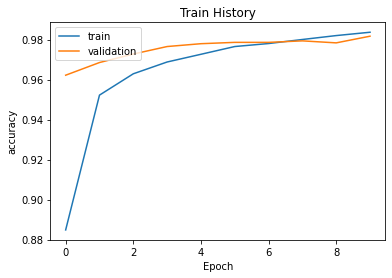

In [49]:
show_train_history(train_history, 'accuracy', 'val_accuracy')
# accuracy, val_accuracy 差距極小，基本解決 overfitting

In [50]:
# 評估模型準確率
score = model.evaluate(x_test_normalize, y_test_one_hot)
print('accuracy = ', score[1])

10000/10000 [==============================] - 0s 30us/step
accuracy =  0.9812999963760376
